# Kernel-PCA in Machine Learning

This notebook covers the implementation of polynomial and Gaussian (RBF) kernel matrices, along with projections, centering, and Frobenius norm calculations. It's a part of an IIT-M assignment.


**Note to Learners**:

- random_state = 0 (seed)
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.


## Imports

In [348]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. Ignore the vector $y$. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [349]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.9, noise=0.2, random_state=0)

## Problem 1
Plot the dataset using matplotlib.

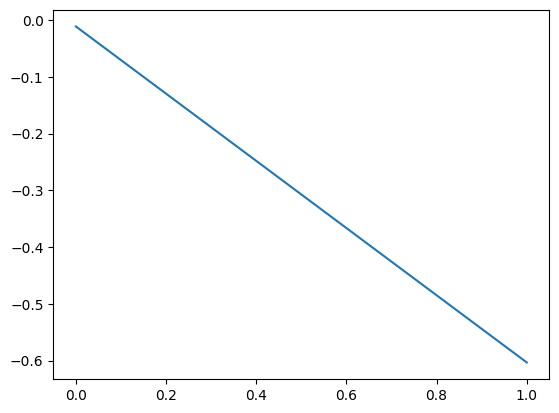

<Figure size 640x480 with 0 Axes>

In [350]:
# Enter your solution here
plt.plot(X[1])
plt.show()
plt.clf()

## Problem 2
How many samples are there in the dataset?


In [351]:
# Enter your solution here
n = np.shape(X)[0] # np.shape would return (1000, 2) == (n, d)
n
print(f"#samples = {n}")

#samples = 1000


## Problem 3
How many features are there in the dataset?

In [352]:
# Enter your solution here
d = np.ndim(X)
# d = X.shape[1]
print(f"#features = {d} | dimension = {d}d")

#features = 2 | dimension = 2d


## Problem 4
Find the kernel matrix $K$ using the polynomial kernel with degree $2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [353]:
# first lets calculate the kernel matrix

# the polynomial kernel in degree 2 is: K(x, x') = (x @ x' + c)^2

G = (X @ X.T + 1) # calculate the gram matrix
K = G ** 2 # apply the polynomial kernel: K = (G)^2 ; with c = 1

K.shape # Kernel matrix is (n x n), output: (1000, 1000)

# K[0,1] # kernel of x_0 with x_1

(1000, 1000)

In [354]:
# Enter your solution here

f_norm = np.sqrt(np.sum(K**2)) # get the Frobenius norm of the kernel matrix
# f_norm
conversion_prob_4 = f_norm/n

print(f'answer of the problem-4 with two decimal places is = {conversion_prob_4:.2f}\n') # answer with 2 decimal places
conversion_prob_4 # here is the real one :)

answer of the problem-4 with two decimal places is = 2.10



np.float64(2.096195646589988)

## Problem 5
Find the kernel matrix $K$ using the Gaussian kernel with parameter $\sigma = 2$.

<u>Formula</u> for the classic Gaussian (RBF) kernel:

$$
K_{ij} = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right) \quad \text{with } \sigma=2
$$

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:


$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [355]:
# Enter your solution here

sigma = 2 ## σ=2

# compute squared Euclidean distances
X_sq_raw = np.sum(X**2, axis=1) # this gives an 1d array (1000,); need to reshape it in 2d as (1000,1)

X_square = X_sq_raw.reshape(-1,1) # -1 act as: do whatever it takes to reshape it w/ 1 column :) and set how much row is required
## X_square

# this childhood formula seems gold :) => ||x_i - x_j||^2 = ||x_i||^2 + ||x_j||^2 - 2x_i.T @ x_j

sq_dists = X_square + X_square.T - 2 * (X @ X.T)  # we used this childhood formula here

K_rbf = np.exp(-sq_dists / (2*(sigma**2)) )

conversion_prob_5 = np.sqrt(np.sum(K_rbf ** 2))/n

print(f'answer of the problem-5 with two decimal places is = {conversion_prob_5:.2f}\n') # answer with 2 decimal places
conversion_prob_5 # here is the real one :)


answer of the problem-5 with two decimal places is = 0.81



np.float64(0.8079400085320029)

## Problem 6
Find the center of the kernel matrix $K$ obtained in problem 2. Call this centered matrix $KC$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} KC_{ij}^2}
$$

In [356]:
# Enter your solution here

K_mean = np.mean(K) # get the mean of our polynomial kernel matrix [degree 2]
K_centered = K - K_mean # the centered kernel matrix

f_norm_centered = np.sqrt(np.sum(K_centered**2)) # get the Frobenius norm of the centered kernel matrix

conversion_prob_6 = f_norm_centered/n

print(f'answer of the problem-6 with two decimal places is = {conversion_prob_6:.2f}\n') # answer with 2 decimal hood
conversion_prob_6 # here is the real one :)

answer of the problem-6 with two decimal places is = 1.48



np.float64(1.4800682012409276)

## Problem 7
Find the projections (scalar) of all the data points on to the first two principal components obtained using polynomial kernel of degree 2.

<u>Conversion</u>

if $\alpha_1, \alpha_2, ..., \alpha_n$ are the projections on the first PC and $\beta_1, \beta_2, ..., \beta_n$ are the projections on the second PC, enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sum_{i = 1}^{n} |\alpha_i| + \cfrac{1}{n} \sum_{i = 1}^{n} |\beta_i|
$$

In [357]:
# Enter your solution here

## K_centered # we have our precalculated centered kernel matrix

k_centered_covariance = np.cov(K_centered) # here we get the covariance of the centered Kernel matrix
## k_centered_covariance

eigenvals, eigenvecs = np.linalg.eigh(k_centered_covariance)

sorted_indices = np.argsort(eigenvals)[::-1] # sorts all the eigenvalues in desc ## used [::-1] to make it desc

eigenvalues_sorted = eigenvals[sorted_indices] # got all the eigenvalues sorted in decreasing order

w1 = eigenvecs[:,sorted_indices[0]] # presenting the 1st principle component
w2 = eigenvecs[:,sorted_indices[1]] # the 2nd principle component




<u>Conversion</u>

if $\alpha_1, \alpha_2, ..., \alpha_n$ are the projections on the first PC and $\beta_1, \beta_2, ..., \beta_n$ are the projections on the second PC, enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sum_{i = 1}^{n} |\alpha_i| + \cfrac{1}{n} \sum_{i = 1}^{n} |\beta_i|
$$

In [360]:
# here lets compute the answer of the problem 7

# proj_w1_KC = w1 @ (K_centered @ w1)
# proj_w2_KC = w2 @ (K_centered @ w2)

proj_w1_KC = w1 @ (w1.T @ K_centered)
proj_w2_KC = w2 @ (w2.T @ K_centered)

conversion_prob_7 = np.sum(np.abs(proj_w1_KC))/n + np.sum(np.abs(proj_w2_KC))/n
# conversion_prob_7 = np.sum(proj_w1_KC)/n + np.sum(proj_w2_KC)/n


conversion_prob_7
# K_centered.shape[0]

print(f'answer of the problem-7 with two decimal places is = {conversion_prob_7:.2f}\n') # answer with 2 decimal hood
conversion_prob_7 # here is the real one :)

answer of the problem-7 with two decimal places is = 1.97



np.float64(1.9687309347376103)